<a href="https://colab.research.google.com/github/anahitaoladan/Artificial-Intelligence/blob/main/mini_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

بخش ۳ و۴ پرسش ۶

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


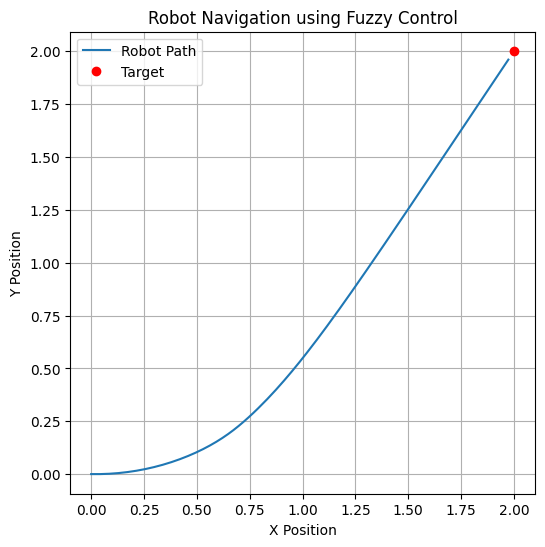

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# ---------- 1. Define fuzzy variables ---------- #
distance = ctrl.Antecedent(np.linspace(0, 3, 100), 'distance')
angle = ctrl.Antecedent(np.linspace(-np.pi, np.pi, 100), 'angle')
v = ctrl.Consequent(np.linspace(0, 0.5, 100), 'v')
omega = ctrl.Consequent(np.linspace(-1, 1, 100), 'omega')

# ---------- 2. Membership functions ---------- #
# Distance
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 1])
distance['medium'] = fuzz.trimf(distance.universe, [0.5, 1.5, 2.5])
distance['far'] = fuzz.trimf(distance.universe, [1.5, 3, 3])

# Angle
angle['NL'] = fuzz.trimf(angle.universe, [-np.pi, -np.pi, -2])
angle['NS'] = fuzz.trimf(angle.universe, [-np.pi, -1, 0])
angle['Z'] = fuzz.trimf(angle.universe, [-0.3, 0, 0.3])
angle['PS'] = fuzz.trimf(angle.universe, [0, 1, np.pi])
angle['PL'] = fuzz.trimf(angle.universe, [2, np.pi, np.pi])

# Linear speed
v['slow'] = fuzz.trimf(v.universe, [0, 0, 0.2])
v['medium'] = fuzz.trimf(v.universe, [0.1, 0.25, 0.4])
v['fast'] = fuzz.trimf(v.universe, [0.3, 0.5, 0.5])

# Angular speed
omega['SL'] = fuzz.trimf(omega.universe, [-1, -1, -0.6])
omega['L'] = fuzz.trimf(omega.universe, [-0.7, -0.3, -0.1])
omega['Z'] = fuzz.trimf(omega.universe, [-0.2, 0, 0.2])
omega['R'] = fuzz.trimf(omega.universe, [0.1, 0.3, 0.7])
omega['SR'] = fuzz.trimf(omega.universe, [0.6, 1, 1])

# ---------- 3. Fuzzy rules ---------- #
rules = [
    ctrl.Rule(distance['far'] & angle['NL'], (v['medium'], omega['SL'])),
    ctrl.Rule(distance['far'] & angle['NS'], (v['fast'], omega['L'])),
    ctrl.Rule(distance['far'] & angle['Z'], (v['fast'], omega['Z'])),
    ctrl.Rule(distance['far'] & angle['PS'], (v['fast'], omega['R'])),
    ctrl.Rule(distance['far'] & angle['PL'], (v['medium'], omega['SR'])),

    ctrl.Rule(distance['medium'] & angle['NL'], (v['slow'], omega['SL'])),
    ctrl.Rule(distance['medium'] & angle['NS'], (v['medium'], omega['L'])),
    ctrl.Rule(distance['medium'] & angle['Z'], (v['medium'], omega['Z'])),
    ctrl.Rule(distance['medium'] & angle['PS'], (v['medium'], omega['R'])),
    ctrl.Rule(distance['medium'] & angle['PL'], (v['slow'], omega['SR'])),

    ctrl.Rule(distance['close'] & angle['NL'], (v['slow'], omega['SL'])),
    ctrl.Rule(distance['close'] & angle['NS'], (v['slow'], omega['L'])),
    ctrl.Rule(distance['close'] & angle['Z'], (v['slow'], omega['Z'])),
    ctrl.Rule(distance['close'] & angle['PS'], (v['slow'], omega['R'])),
    ctrl.Rule(distance['close'] & angle['PL'], (v['slow'], omega['SR']))
]

# ---------- 4. Control system ---------- #
control_system = ctrl.ControlSystem(rules)
fuzzy_controller = ctrl.ControlSystemSimulation(control_system)

# ---------- 5. Robot simulation ---------- #
x, y, theta = 0, 0, 0
xg, yg, thetag = 2, 2, np.pi/2
trajectory = [(x, y)]

dt = 0.1
for _ in range(300):
    d = np.sqrt((xg - x)**2 + (yg - y)**2)
    if d < 0.05:
        break

    angle_to_goal = np.arctan2(yg - y, xg - x)
    alpha = angle_to_goal - theta
    alpha = (alpha + np.pi) % (2 * np.pi) - np.pi  # Normalize

    fuzzy_controller.input['distance'] = d
    fuzzy_controller.input['angle'] = alpha
    fuzzy_controller.compute()

    v_cmd = fuzzy_controller.output['v']
    omega_cmd = fuzzy_controller.output['omega']

    x += v_cmd * np.cos(theta) * dt
    y += v_cmd * np.sin(theta) * dt
    theta += omega_cmd * dt
    trajectory.append((x, y))

# ---------- 6. Plot path ---------- #
trajectory = np.array(trajectory)
plt.figure(figsize=(6,6))
plt.plot(trajectory[:,0], trajectory[:,1], label='Robot Path')
plt.plot(xg, yg, 'ro', label='Target')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Robot Navigation using Fuzzy Control')
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.show()

پرسش ۷ بخش ۱

In [ ]:
https://drive.google.com/file/d/17apQsdAjw-33X0HA1CRNC_sC0G4R8n2E/view?usp=share_link

SyntaxError: invalid decimal literal (ipython-input-1-939902592.py, line 1)

In [ ]:
!pip install gdown

import gdown

file_id = "17apQsdAjw-33X0HA1CRNC_sC0G4R8n2E"

url = f"https://drive.google.com/uc?id={file_id}"

output = "diabetes.csv"


gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17apQsdAjw-33X0HA1CRNC_sC0G4R8n2E
To: /content/diabetes.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 33.6MB/s]


'diabetes.csv'

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv("diabetes.csv")

# Display the full dataset
print("Full dataset:")
print(df)

# Identify columns where zero values are not valid
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the median of each column
for col in columns_to_fix:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Separate features (X) and target (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Preprocessing completed successfully.")

Full dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1    

پرسش ۷ سوال ۲

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
glucose = ctrl.Antecedent(np.arange(0, 201, 1), 'glucose')
bmi = ctrl.Antecedent(np.arange(10, 60, 1), 'bmi')
age = ctrl.Antecedent(np.arange(10, 100, 1), 'age')
bp = ctrl.Antecedent(np.arange(40, 130, 1), 'bp')
risk = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'risk')

# Automatically generate fuzzy membership functions
glucose.automf(names=['low', 'medium', 'high'])
bmi.automf(names=['low', 'medium', 'high'])
age.automf(names=['young', 'middle', 'old'])
bp.automf(names=['low', 'normal', 'high'])
risk.automf(names=['low', 'medium', 'high'])

# Define fuzzy rules
rules = [
    ctrl.Rule(glucose['high'] & bmi['high'] & age['old'], risk['high']),
    ctrl.Rule(glucose['medium'] & bmi['medium'] & age['middle'], risk['medium']),
    ctrl.Rule(glucose['low'] & bmi['low'] & age['young'], risk['low']),
    ctrl.Rule(bp['high'] & bmi['high'], risk['high']),
    ctrl.Rule(bp['low'] & glucose['low'], risk['low']),
    ctrl.Rule(age['old'] & glucose['medium'], risk['medium'])
]

# Create fuzzy control system
risk_ctrl = ctrl.ControlSystem(rules)
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

# Convert linguistic label to numerical midpoint value
def linguistic_to_numeric(var_name, label):
    midpoints = {
        'age': {'young': 20, 'middle': 45, 'old': 75},
        'bmi': {'low': 18, 'medium': 30, 'high': 42},
        'glucose': {'low': 80, 'medium': 125, 'high': 180},
        'bp': {'low': 60, 'normal': 80, 'high': 110}
    }
    return midpoints[var_name][label]

# Get linguistic inputs from user
age_label = input("What is the age level? (young / middle / old): ").strip().lower()
bmi_label = input("What is the BMI level? (low / medium / high): ").strip().lower()
glucose_label = input("What is the glucose level? (low / medium / high): ").strip().lower()
bp_label = input("What is the blood pressure level? (low / normal / high): ").strip().lower()

# Set inputs based on linguistic labels
risk_sim.input['age'] = linguistic_to_numeric('age', age_label)
risk_sim.input['bmi'] = linguistic_to_numeric('bmi', bmi_label)
risk_sim.input['glucose'] = linguistic_to_numeric('glucose', glucose_label)
risk_sim.input['bp'] = linguistic_to_numeric('bp', bp_label)

# Run the fuzzy system
risk_sim.compute()
result = round(risk_sim.output['risk'], 3)

# Output result
print("\nPredicted Diabetes Risk:", result)
if result < 0.3:
    print("Risk Level: LOW")
elif result < 0.7:
    print("Risk Level: MEDIUM")
else:
    print("Risk Level: HIGH")

What is the age level? (young / middle / old): old
What is the BMI level? (low / medium / high): low
What is the glucose level? (low / medium / high): low
What is the blood pressure level? (low / normal / high): low

Predicted Diabetes Risk: 0.487
Risk Level: MEDIUM


پرسش ۷ سوال ۳

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# تعریف تابع برای تبدیل ورودی زبانی به عدد
def linguistic_to_numeric(var_name, label):
    midpoints = {
        'age': {'young': 20, 'middle': 45, 'old': 75},
        'bmi': {'low': 18, 'medium': 30, 'high': 42},
        'glucose': {'low': 80, 'medium': 125, 'high': 180},
        'bp': {'low': 60, 'normal': 80, 'high': 110}
    }
    return midpoints[var_name][label]

# گرفتن ورودی‌های زبانی از کاربر
age_label = input("Age level (young / middle / old): ").strip().lower()
bmi_label = input("BMI level (low / medium / high): ").strip().lower()
glucose_label = input("Glucose level (low / medium / high): ").strip().lower()
bp_label = input("Blood pressure level (low / normal / high): ").strip().lower()

# تبدیل به مقادیر عددی
age_val = linguistic_to_numeric('age', age_label)
bmi_val = linguistic_to_numeric('bmi', bmi_label)
glucose_val = linguistic_to_numeric('glucose', glucose_label)
bp_val = linguistic_to_numeric('bp', bp_label)

# آماده‌سازی ورودی برای شبکه
X_input = np.array([[glucose_val, bmi_val, age_val, bp_val]])

# تعریف یک مدل MLP بسیار ساده
model = Sequential([
    Dense(6, input_dim=4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# کامپایل مدل بدون آموزش (فقط برای اجرای ساختار)
model.compile(optimizer='adam', loss='binary_crossentropy')

# پیش‌بینی روی ورودی بدون آموزش مدل
output = model.predict(X_input)

# نمایش خروجی
print("\nPredicted output (risk):", round(float(output[0][0]), 3))

Age level (young / middle / old): old
BMI level (low / medium / high): low
Glucose level (low / medium / high): low
Blood pressure level (low / normal / high): low


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

Predicted output (risk): 0.19
